# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el datosset de casos totales, divididos por país [aquí.](
https://ourworldindatos.org/coronavirus-datos?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales. **Nota**: **Hacer Bootsprap. Armar un gráfico de intervalos de errores de k. Hago una exponencial con el Kmax, con el Kmin, le ploteo arriba Kmed y a todo eso le superpongo los datos de casos mundiales.**

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó". **Nota: Investigar diferencias entre países que hicieron o no cuarentena como Arg, Brz o USA**.
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores. **Nota: Variación de k contagios, varaición de k muertes, ratio muertes = muertes/casos confirmados.**
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados. **Nota: Hay que armarse el data set con varios estadísticos por país para entrenar el modelo, idealmente independientes**.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

#¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



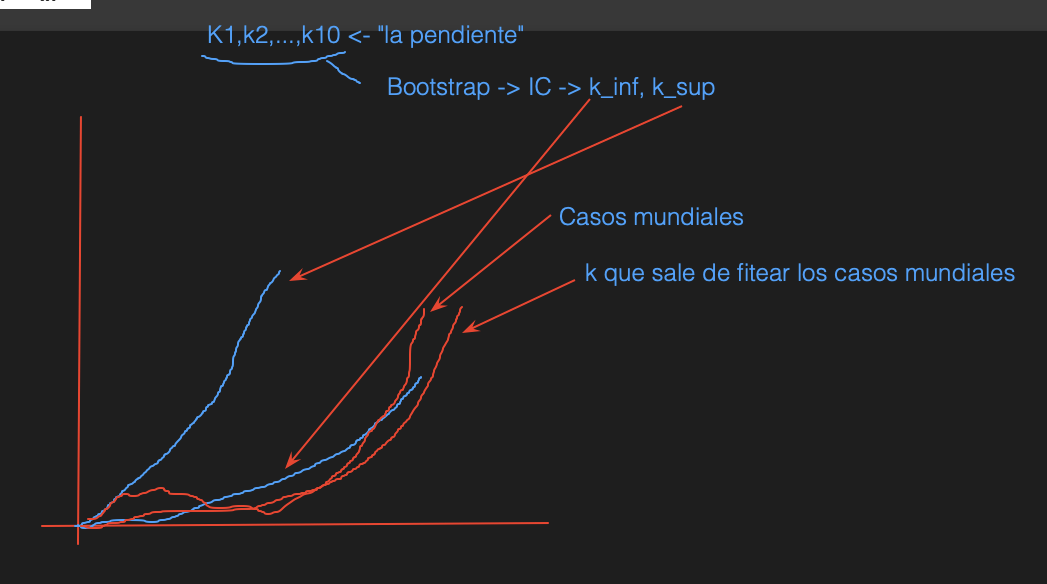

In [ ]:
                                           ##----------------------------ARMARSE EL DATA SET-------------------------------

          ## target cuatrentena | k muertes | k contagios  | ratio muertes | ratio contagios ..... | K1 | K2 | K3 | Cantidad de olas | estación | estadísticos
# país 1.           
# país 2. 
# ...
# país n.

In [ ]:
# Me baje los 5 datossets con los siguientes países:
# Unated States. 1
# France. 2
# Canada. 3
# Spain. 4
# India. 5
# Germany. 6
# Italy.  7
# Japan.  8
# Andorra. 9
# China. 10
# Argentina. Bonus 1
# Brazil. Bonus 2
# Chile. Bonus 3

## Ver final del grabación de clase del 25/10 - Que habría que hacer.

In [ ]:
import numpy as np
import pandas as pd
import pylab as plt
from google.colab import drive
from scipy.optimize import curve_fit
import seaborn as sns
## Importo las funciones de accuracy y testeo de modelos:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
## Importo los modelos que voy a usar/probar:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
## Librerías de optimización de modelos:
from sklearn.model_selection import RandomizedSearchCV


# Defino mi matriz de confusión: 

def confusion(ytest,y_pred):
    names=["0","1"]
    cm=confusion_matrix(ytest,y_pred,normalize='true')
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",ax=ax) #fmt=".0f",
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [ ]:
#cargamos los datos

drive.mount('/content/gdrive', force_remount=True)

# Aca deben apuntar a la carpeta de su drive donde guardaron los datos
#root_dir = "/content/gdrive/My Drive/datos_acamica" 

Mounted at /content/gdrive


In [ ]:
# datos sets que me bajé:

daily_covid_cases_deaths = '/content/gdrive/MyDrive/Post Grado DS Acamica/Sprint 4/Proyecto 4/data_sets/daily-covid-cases-deaths.csv'
cumulative_deaths_an_cases_covid19 = '/content/gdrive/MyDrive/Post Grado DS Acamica/Sprint 4/Proyecto 4/data_sets/cumulative-deaths-and-cases-covid-19.csv'
daily_tests_an_daily_new_confirmed_covid_cases = '/content/gdrive/MyDrive/Post Grado DS Acamica/Sprint 4/Proyecto 4/data_sets/daily-tests-and-daily-new-confirmed-covid-cases.csv'
covid_tests_cases_deaths = '/content/gdrive/MyDrive/Post Grado DS Acamica/Sprint 4/Proyecto 4/data_sets/covid-tests-cases-deaths.csv'
covid_tests_cases_deaths_per_million = '/content/gdrive/MyDrive/Post Grado DS Acamica/Sprint 4/Proyecto 4/data_sets/covid-tests-cases-deaths-per-million.csv'  # Voy a usar estos datos para tener algo mas estandar.


In [ ]:
datos=pd.read_csv(covid_tests_cases_deaths_per_million)
datos

,Entity,Code,Day,total_tests_per_thousand,142605-annotations,Total confirmed cases of COVID-19 per million people,Total confirmed deaths due to COVID-19 per million people
0,Afghanistan,AFG,2020-02-24,NaN,NaN,0.126,NaN
1,Afghanistan,AFG,2020-02-25,NaN,NaN,0.126,NaN
2,Afghanistan,AFG,2020-02-26,NaN,NaN,0.126,NaN
3,Afghanistan,AFG,2020-02-27,NaN,NaN,0.126,NaN
4,Afghanistan,AFG,2020-02-28,NaN,NaN,0.126,NaN
...,...,...,...,...,...,...,...
123013,Zimbabwe,ZWE,2021-10-18,NaN,NaN,8770.640,308.637
123014,Zimbabwe,ZWE,2021-10-19,NaN,NaN,8773.092,308.703
123015,Zimbabwe,ZWE,2021-10-20,NaN,NaN,8775.212,308.703
123016,Zimbabwe,ZWE,2021-10-21,NaN,NaN,8782.037,308.902


In [ ]:
paises_unicos = datos.Entity.unique()


In [ ]:
datos.describe()

,total_tests_per_thousand,Total confirmed cases of COVID-19 per million people,Total confirmed deaths due to COVID-19 per million people
count,5.533200e+04,121292.000000,110331.000000
mean,4.722185e+05,18552.701439,384.708988
std,1.150691e+06,31176.242930,640.878392
min,0.000000e+00,0.001000,0.000000
25%,2.186800e+04,380.533000,11.170000
50%,1.098475e+05,2960.828500,75.072000
75%,4.371308e+05,22931.788000,478.885000
max,1.601323e+07,223455.667000,5995.399000


In [ ]:
# Chequeo valores faltantes:

nombre_columnas_ = datos.columns # Me armo un vector con los nombres de las columnas
bool_mat = datos.isna()
tamaño_con_nans = datos.shape

print('----------')
print('datos')
print('----------')
print('Tamaño de datos: ',tamaño_con_nans)
print('----------')

faltantes = []
for nombre in nombre_columnas_: # Voy iterando el nombre del vector nombre_columnas con un for.
  print('Falantes en: ',nombre,': ',sum(bool_mat[nombre]),' valores.')
  faltantes.append(sum(bool_mat[nombre]))

datos.head()

# Termino borrando los poquitos NaN que me quedan:
#datos = datos.dropna(inplace = True)
#tamaño_sin_nans = datos.shape()
#print('Tamaño de datos: ',tamaño_sin_nans)
#print('Se pierde: ', round(((tamaño_con_nans[0] - tamaño_sin_nans[0])/tamaño_sin_nans[0])*100,3), '% del datos set')

----------
datos
----------
Tamaño de datos:  (123018, 7)
----------
Falantes en:  Entity :  0  valores.
Falantes en:  Code :  9020  valores.
Falantes en:  Day :  0  valores.
Falantes en:  total_tests_per_thousand :  67686  valores.
Falantes en:  142605-annotations :  69301  valores.
Falantes en:  Total confirmed cases of COVID-19 per million people :  1726  valores.
Falantes en:  Total confirmed deaths due to COVID-19 per million people :  12687  valores.


,Entity,Code,Day,total_tests_per_thousand,142605-annotations,Total confirmed cases of COVID-19 per million people,Total confirmed deaths due to COVID-19 per million people
0,Afghanistan,AFG,2020-02-24,NaN,NaN,0.126,NaN
1,Afghanistan,AFG,2020-02-25,NaN,NaN,0.126,NaN
2,Afghanistan,AFG,2020-02-26,NaN,NaN,0.126,NaN
3,Afghanistan,AFG,2020-02-27,NaN,NaN,0.126,NaN
4,Afghanistan,AFG,2020-02-28,NaN,NaN,0.126,NaN


In [ ]:
#datos=pd.read_csv(covid_tests_cases_deaths)
paises=datos['Entity'] #cargo el vector de paises
#confirmados=datos['Total confirmed cases of COVID-19'] #carga vector todos los casos confirmados

confirmados= datos['Total confirmed cases of COVID-19 per million people']

Text(0, 0.5, 'cantidad de casos')

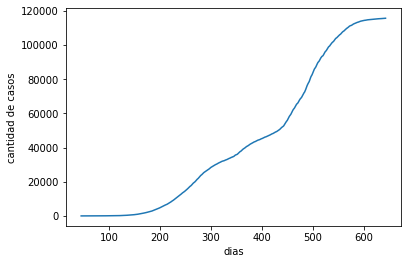

In [ ]:
ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))
plt.plot(dias,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


Text(0, 0.5, 'log cantidad de casos')

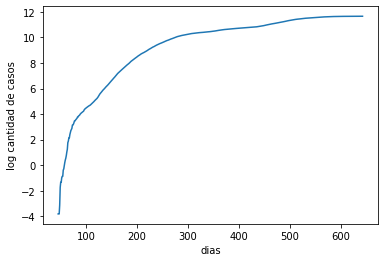

In [ ]:
plt.plot(dias,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Veamos lo que pasa en los primeros 60 días desde que se detectó el primer caso en Argentina, para ver cómo fue el $k$ inicial

Text(0, 0.5, 'cantidad de casos')

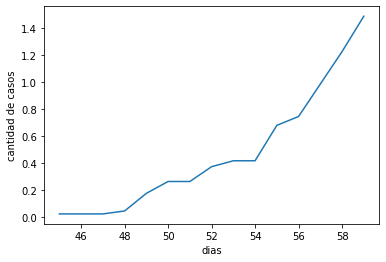

In [ ]:
casos_principio=casos_arg[0:60]
dias_principio=dias[0:60]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0, 0.5, 'log cantidad de casos')

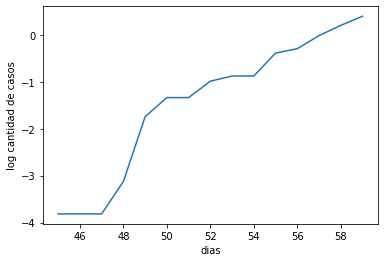

In [ ]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Mejor nos quedamos con lo que sucede entre los días 31 y 55, ya que ese fue el comportamiento más sostenido.

Text(0, 0.5, 'cantidad de casos')

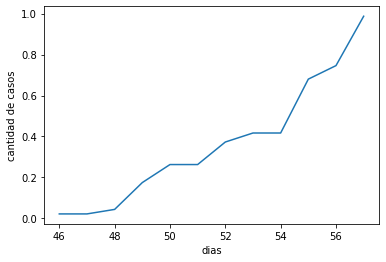

In [ ]:
casos_principio=casos_arg[46:58] # 31:55
dias_principio=dias[46:58] # 31:55

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

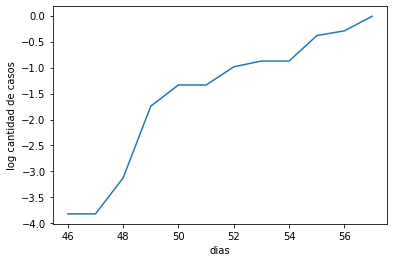

In [ ]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [ ]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [ ]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([ 0.23093272, 57.06239595])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

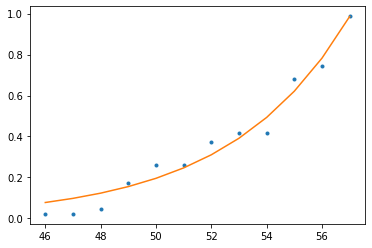

In [ ]:
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [ ]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

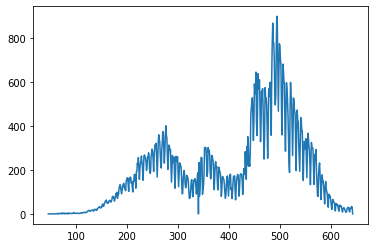

In [ ]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)

# Parte 1:

##  1.A) Voy a armarme las curvas de casos $Confirmados=e^{k(t-t_0)}$ por millón, para los 10 países que elegí.

Trato de responderme la pregunta: 
¿Es posible estimar el comportamiento de la curva exponencial de contagios por millón de habitantes mundial, con la información obtenida de los ritmos de contagios de los países seleccionados?

In [ ]:
## Elección de cortes de días para los distitnos países:
data_2 = pd.read_csv(covid_tests_cases_deaths_per_million)
paises = ['Andorra', 'Austria','Canada', 'Egypt', 'France','Israel','Japan', 'Qatar', 'Saudi Arabia', 'Sweden','World']
data_2_select = data_2[(data_2['Entity'].isin(paises))]
data_2_world  = data_2[(data_2['Entity'].isin(['World']))]

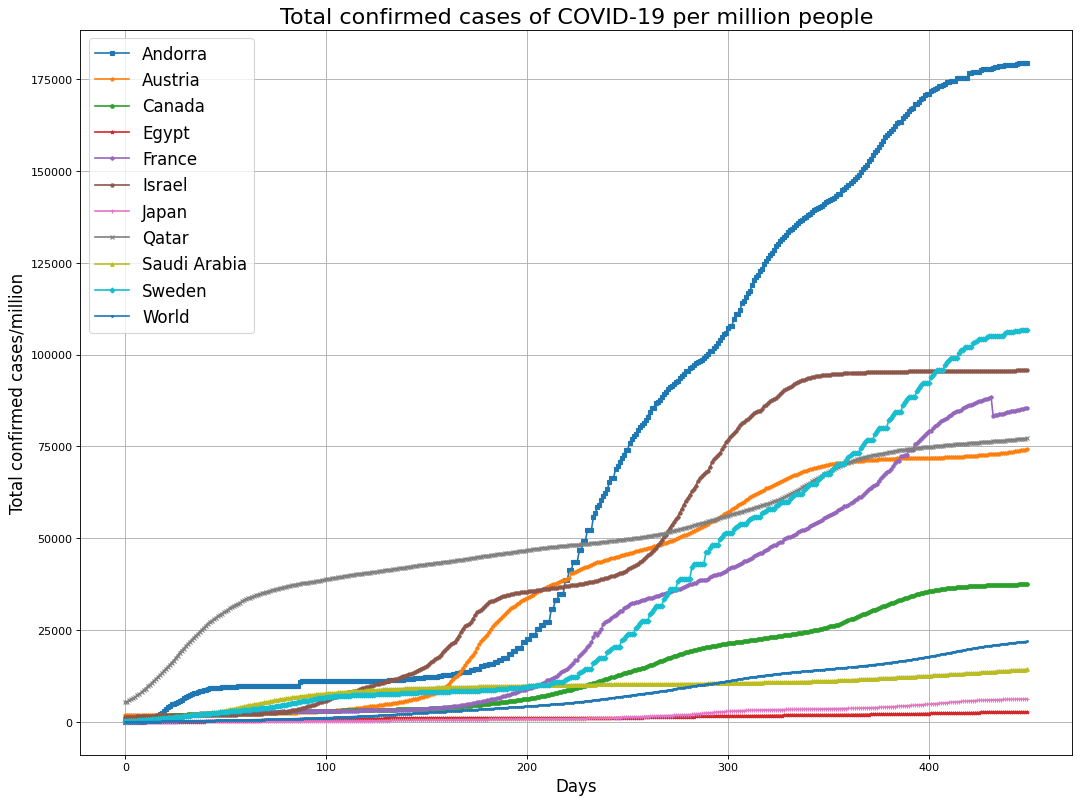

In [ ]:
i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D",".","*"]

for pais in paises:
   casos_pais = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == pais)][50:500]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Total confirmed cases of COVID-19 per million people', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()

## Tomo los siguientes intervalos de días a mano:

# Andorra: 200 - 300
# Austria: 150 - 250
# Canada: 200 - 300
# Egypt: 50 - 150
# France: 200 - 300
# Israel: 120 - 220
# Japan: 250 - 350
# Qatar: 0 - 100
# Saudi Arabia: 50 - 150
# Sweden: 200 - 300

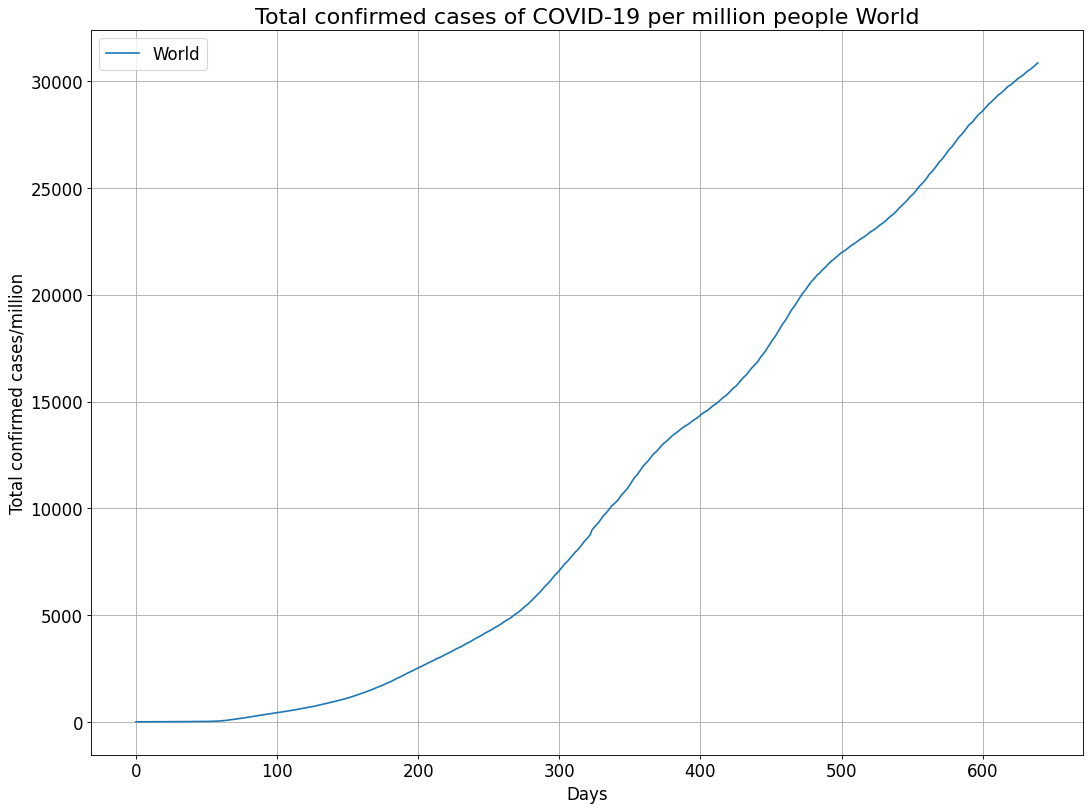

In [ ]:
casos_world = data_2_world['Total confirmed cases of COVID-19 per million people']
dias = np.arange(casos_world.shape[0]) 

plt.figure(figsize=(8*scale, 6*scale), dpi=80)
plt.plot(dias,casos_world, label = 'World')
plt.title('Total confirmed cases of COVID-19 per million people World', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()

In [ ]:
# El codigo este va de yapa por si me piden hacer el DF de forma mas prolija. 
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#dataFiltrada = {'Pais':  ['Andorra','Austria','Canada','Egypt','France','Israel','Japan','Qatar','Saudi Arabia','Sweden','World'],
#        'DiaInicial': [200,150,200,50,200,120,250,0,50,200,200],
#         'DiaFinal': [300,250,300,150,300,220,350,100,150,300,300]}

#df = pd.DataFrame(dataFiltrada)

#ks = []
#for i in range(df.shape[0]):
#  casosParaCalcularK = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == df.Pais[i])][df.DiaInicial[i]:df.DiaFinal[i]]
#  popt, pcov = curve_fit(exponencial, np.arange(df.DiaInicial[i],df.DiaFinal[i]), casosParaCalcularK, maxfev = 2000)
#  ks.append(popt[0])
#df['Ks'] = ks
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Andorra: 200 - 300
# Austria: 150 - 250
# Canada: 200 - 300
# Egypt: 50 - 150
# France: 200 - 300
# Israel: 120 - 220
# Japan: 250 - 350
# Qatar: 0 - 100
# Saudi Arabia: 50 - 150
# Sweden: 200 - 300
# World: 0 - 250

d_andorra    = np.arange(200,301)
d_austria    = np.arange(150,251)
d_canada     = np.arange(200,301)
d_egypt      = np.arange(50,151)
d_france     = np.arange(200,301)
d_israel     = np.arange(120,221)
d_japan      = np.arange(250,351)
d_qatar      = np.arange(0,101)
d_saudi_arab = np.arange(50,151)
d_sweden     = np.arange(200,301)
d_world      = np.arange(200,301)

In [ ]:
#'Andorra')][200:301]
#'Austria')][150:251]
#'Canada')][200:301]
#'Egypt')][50:151]
#'France')][200:301]
#'Japan')][250:351]
#'Israel')][120:221]
#'Qatar')][0:101]
#'Saudi Arabia')][50:151]
#'Sweden')][200:301]
#'World')][200:301]

In [ ]:
## Correr las K.

casos_andorra = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == 'Andorra')][200:301]
casos_austria = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == 'Austria')][150:251]
casos_canada = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == 'Canada')][200:301]
casos_egypt = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == 'Egypt')][50:151]
casos_france = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == 'France')][200:301]
casos_israel = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == 'Israel')][120:221]
casos_japan = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == 'Japan')][250:351]
casos_qatar = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == 'Qatar')][0:101]
casos_saudi = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == 'Saudi Arabia')][50:151]
casos_sweden = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == 'Sweden')][200:301]
casos_world  = data_2_world['Total confirmed cases of COVID-19 per million people'][(data_2_world.Entity == 'World')][200:301]

#Ajustamos para cada país:

popt_1, pcov_1 = curve_fit(exponencial, d_andorra, casos_andorra, maxfev = 1000)
popt_2, pcov_2 = curve_fit(exponencial, d_austria , casos_austria, maxfev = 1000)
popt_3, pcov_3 = curve_fit(exponencial, d_canada, casos_canada, maxfev = 1000)
popt_4, pcov_4 = curve_fit(exponencial, d_egypt, casos_egypt, maxfev = 1000)
popt_5, pcov_5 = curve_fit(exponencial, d_france, casos_france, maxfev = 1000)
popt_6, pcov_6 = curve_fit(exponencial, d_israel, casos_israel, maxfev = 1000)
popt_7, pcov_7 = curve_fit(exponencial, d_japan, casos_japan, maxfev = 2000)
popt_8, pcov_8 = curve_fit(exponencial, d_qatar, casos_qatar, maxfev = 1000)
popt_9, pcov_9 = curve_fit(exponencial, d_saudi_arab, casos_saudi, maxfev = 1000)
popt_10, pcov_10 = curve_fit(exponencial, d_sweden, casos_sweden, maxfev = 1000)
popt_11, pcov_11 = curve_fit(exponencial, d_world , casos_world, maxfev = 2000)

k = [popt_1[0],popt_2[0],popt_3[0],popt_4[0],popt_5[0],popt_6[0],popt_7[0],popt_8[0],popt_9[0],popt_10[0]] # K optimos
k_world = popt_11[0]

In [ ]:
k_world

0.009979911344514356

In [ ]:
k  # Tenemos las k de los 10 países

## Pais - Indice inicio - Indice Fin - k 
# ANDORRA. 200                301.      0.0230

## Quedan pendients:
# - Boot strap + Intervalo de confianza: Con esto hacemos las curvas max y min.
# - Calculamos la K del mundo.
# - Graficamos todo.

[0.02306832508274961,
 0.029422420667571444,
 0.014483953404644015,
 0.031231595209882917,
 0.025603881516468842,
 0.021625599373526733,
 0.015497631748771114,
 0.03455561258151455,
 0.021281588587208664,
 0.012551816716590032]

## 2.B) Bootstrap e intervalo de confianza:

In [ ]:
## Boot strap:

def remuestreo(datos):
  remuestra=np.zeros(len(datos))
  i=0
  while i<len(datos):
    remuestra[i]=datos[np.random.randint(len(datos))]
    i=i+1
  return remuestra  

(array([1., 0., 0., 3., 0., 0., 0., 2., 2., 2.]),
 array([0.01549763, 0.01740343, 0.01930923, 0.02121503, 0.02312082,
        0.02502662, 0.02693242, 0.02883822, 0.03074402, 0.03264981,
        0.03455561]),
 <a list of 10 Patch objects>)

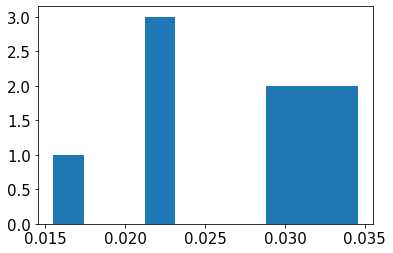

In [ ]:
datos_rem=remuestreo(k)
plt.hist(datos_rem)

0.022846987678344192


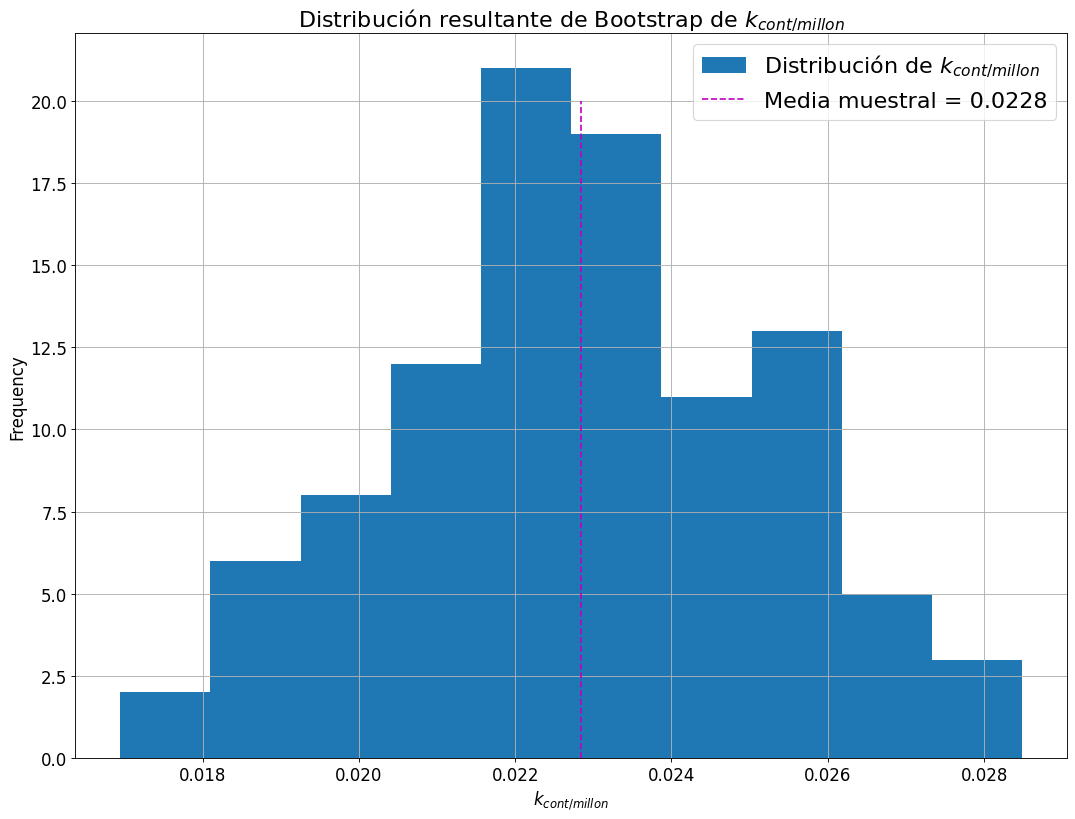

In [ ]:
# Bootstrap:

np.random.seed(8) # Elegir semilla.
nrep = 100
datos_100 = k # Tenemos las k de los 10 países
medias = []

for i in np.arange(nrep):
  datos_rem=remuestreo(datos_100)
  medias.append(np.mean(datos_rem))

mu_muestra    = np.mean(medias)
sigma_muestra = np.std(medias)
print(np.mean(medias))

plt.figure(figsize=(8*scale, 6*scale), dpi=80)
plt.hist(medias, histtype = 'stepfilled',label = 'Distribución de $k_{cont/millon}$')
plt.vlines(mu_muestra, 0, 20, colors='m', linestyles='dashed', label='Media muestral = 0.0228')
plt.title('Distribución resultante de Bootstrap de $k_{cont/millon}$', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('$k_{cont/millon}$', fontsize = 15)
plt.legend(fontsize = 20)
plt.grid()
plt.show()


En este caso si $\alpha=0.05$, corresponde $z_{aplha}=1.96$.

In [ ]:
## Intervalo de conf:
z=1.96
n=len(medias)
int_conf=[mu_muestra-z*sigma_muestra/np.sqrt(n),mu_muestra+z*sigma_muestra/np.sqrt(n)]
print(int_conf)
# Calcular el p valor.

[0.02238101060090268, 0.023312964755785703]


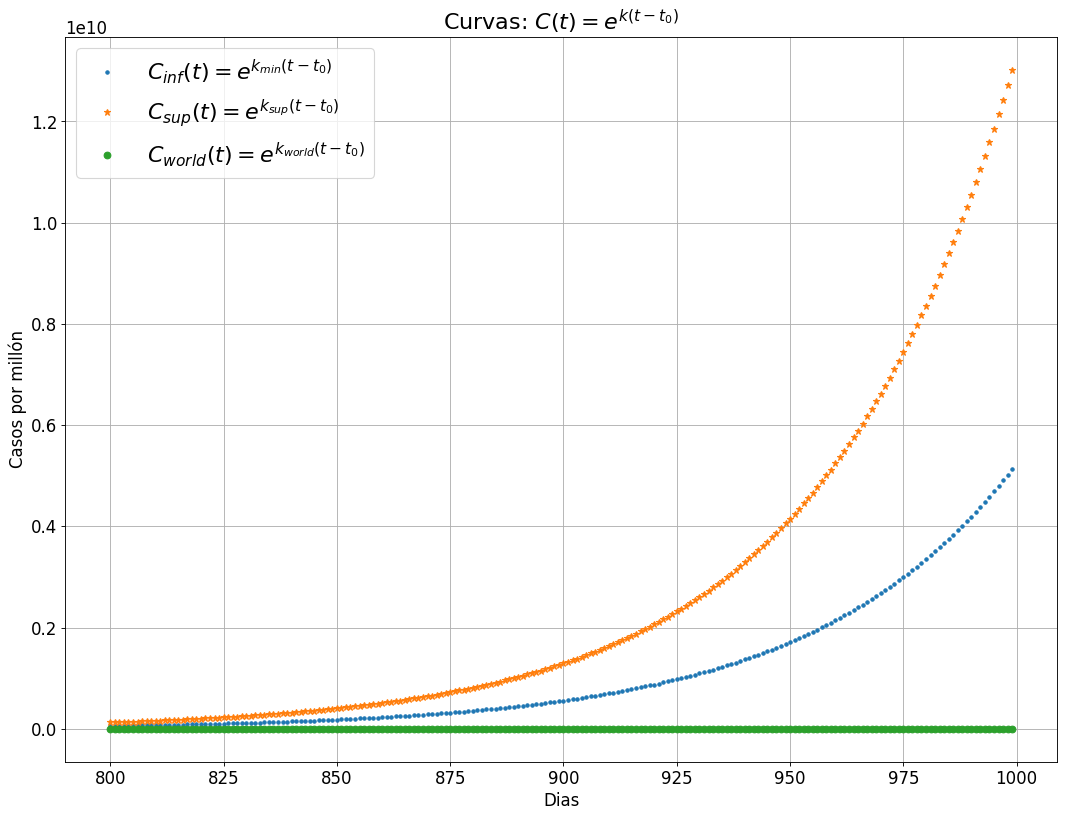

In [ ]:
# Graficos de curvas:
k_min = int_conf[0]
k_max = int_conf[1]
k_mundo = k_world

dias_principio = np.arange(800,1000)

casos_simu_min=exponencial(dias_principio,k_min,0)
casos_simu_max=exponencial(dias_principio,k_max,0)
casos_simu_world=exponencial(dias_principio,k_mundo,0)

plt.figure(figsize=(8*scale, 6*scale), dpi=80)
plt.plot(dias_principio,casos_simu_min,'.', label = '$C_{inf}(t)=e^{k_{min}(t-t_0)}$')
plt.plot(dias_principio,casos_simu_max,'*', label = '$C_{sup}(t)=e^{k_{sup}(t-t_0)}$')
plt.plot(dias_principio,casos_simu_world,'o', label = '$C_{world}(t)=e^{k_{world}(t-t_0)}$')
plt.title('Curvas: $C(t)=e^{k(t-t_0)}$',fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.xlabel('Dias',fontsize = 15)
plt.ylabel('Casos por millón',fontsize = 15)
plt.legend(fontsize = 20)
plt.grid()
plt.show()


## Nota: El k del mundo no cae dentro del intervalo de confianza. Eso se da porque los intervalos de dias que tomamos, representan intervalos de C(t) con K muy variables entre países respecto de una vurva de C(t) que se ve mas suavizada para los casos mundiales.

# Parte 2:

In [ ]:
## Buscar paises que hiciero o no cuarentena:
# Menos cuarentena: 0
  # Brazil
  # Venezuela
  # INDIA
  # Bolivia
  # Sweden
  # UY
  # Holanda
  # Mexico
  # Corea del sur
  # Singapur
  # Dominican Republic

# Mas cuarentena: 1
  # Argentina
  # Italia
  # China
  # España
  # NZ
  # Aus
  # Noruega
  # Alemania
  # Francia
  # UK 
  # Peru

                                             ##----------------------------ARMARSE EL DATA SET-------------------------------

          ## target cuatrentena | k muertes | k contagios  | ratio muertes | ratio contagios ..... | K1 | K2 | Cantidad de olas | estación | estadísticos
# país 1.           0
# país 2.           1
# ...
# país n.           n

In [ ]:
## Armo lista de países con y si cuarentena:
paises_0 = ['Brazil','Venezuela','India','Bolivia','Sweden','Uruguay','Netherlands','Mexico','South Korea','Singapore','Dominican Republic']
paises_1 = ['Argentina','Italy','China','Spain','New Zealand','Australia','Norway','Germany','France','United Kingdom','Peru']
all_paises = ['Brazil','Venezuela','India','Bolivia','Sweden','Uruguay','Netherlands','Mexico','South Korea','Singapore','Dominican Republic',
              'Argentina','Italy','China','Spain','New Zealand','Australia','Norway','Germany','France','United Kingdom','Peru']
cuarentena = [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]

In [ ]:
print(paises_unicos)

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Canada, people tested' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe' 'European Union'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'High income' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Ir

In [ ]:
## Selecciono la data para armar los 3 indicadores estadísticos para cada país: 
# Mis estadísricos van a ser:
# k de muertes por millon: k_deths_mil
# k de contagios por millon: k_ill_mil
# ratio muertes = muertes/casos confirmados.

## Para eso uso el data set anterior que ya me bajé:
data_3 = pd.read_csv(covid_tests_cases_deaths_per_million)
##data_3 = data_3.dropna()
data_3.head()

,Entity,Code,Day,total_tests_per_thousand,142605-annotations,Total confirmed cases of COVID-19 per million people,Total confirmed deaths due to COVID-19 per million people
0,Afghanistan,AFG,2020-02-24,NaN,NaN,0.126,NaN
1,Afghanistan,AFG,2020-02-25,NaN,NaN,0.126,NaN
2,Afghanistan,AFG,2020-02-26,NaN,NaN,0.126,NaN
3,Afghanistan,AFG,2020-02-27,NaN,NaN,0.126,NaN
4,Afghanistan,AFG,2020-02-28,NaN,NaN,0.126,NaN


In [ ]:
# Armo el data set vacío con todos los países:
dat = {'Pais': all_paises, 'k_deaths_mil': np.zeros(len(all_paises)), 'k_ill_mil': np.zeros(len(all_paises)), 'ratio_deaths_cases': np.zeros(len(all_paises)),'target': cuarentena}  
data_ml = pd.DataFrame(dat)
data_ml

,Pais,k_deaths_mil,k_ill_mil,ratio_deaths_cases,target
0,Brazil,0.0,0.0,0.0,0
1,Venezuela,0.0,0.0,0.0,0
2,India,0.0,0.0,0.0,0
3,Bolivia,0.0,0.0,0.0,0
4,Sweden,0.0,0.0,0.0,0
5,Uruguay,0.0,0.0,0.0,0
6,Netherlands,0.0,0.0,0.0,0
7,Mexico,0.0,0.0,0.0,0
8,South Korea,0.0,0.0,0.0,0
9,Singapore,0.0,0.0,0.0,0


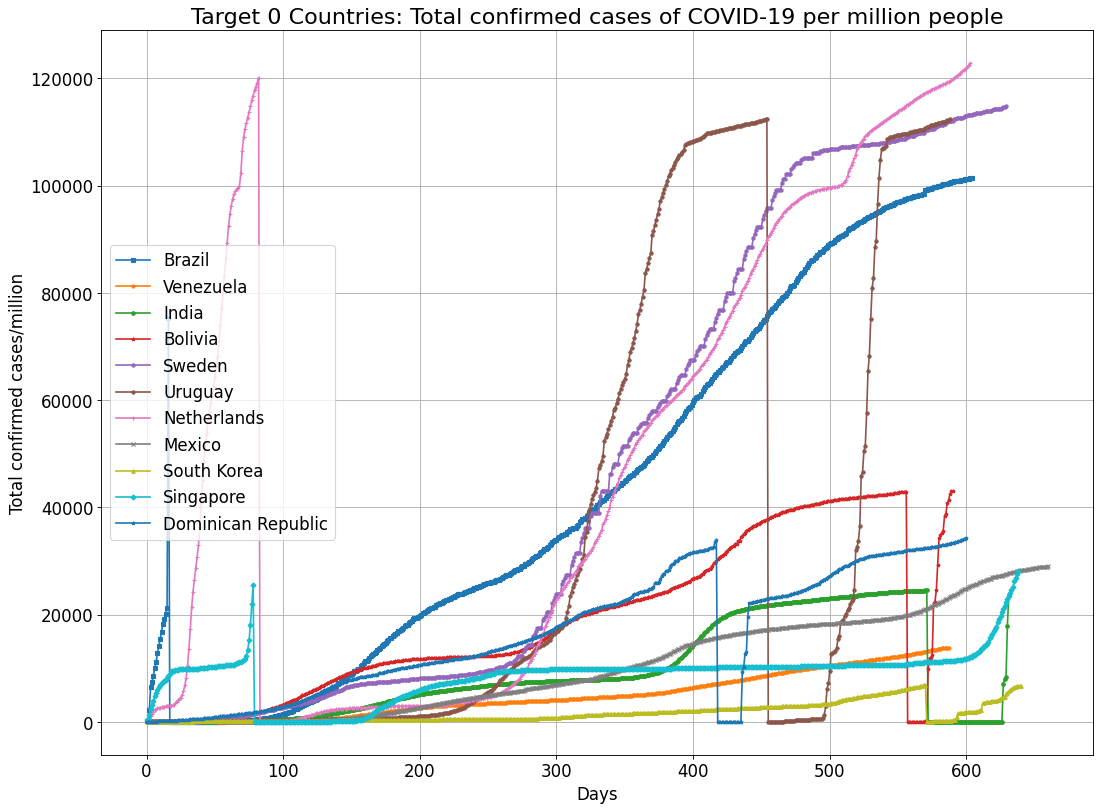

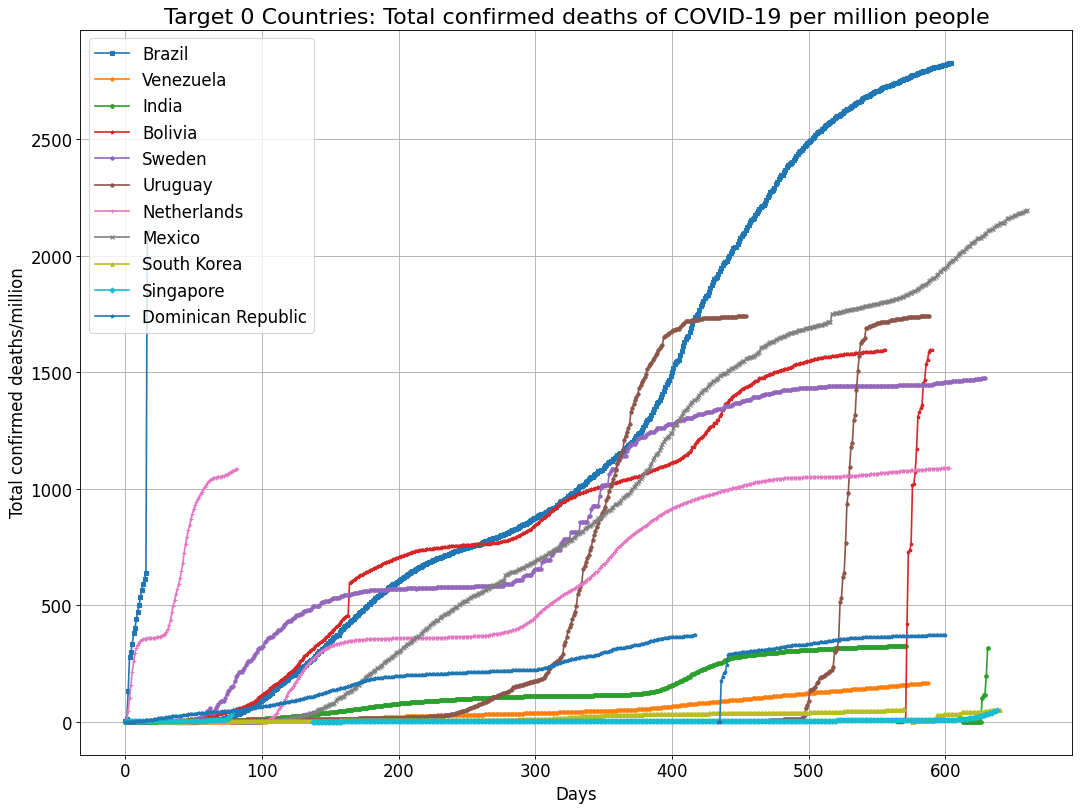

In [ ]:
## Calculo de las k:
# Las voy a calcular en función de los datos de:
cases = 'Total confirmed cases of COVID-19 per million people'
deaths = 'Total confirmed deaths due to COVID-19 per million people'

## Exploratioria de charts de muertes y casos de países que no hiciero cuarentena:
# La idea es ver en que intervalo de dias tomar los datos tanto para casos como para muertes
# y ver que comportamiento tiene la curva de muertes: Expoencial u otra.

## Países sin cuarentena:

#i = 0
#paises = paises_0
#for pais in paises:
#   casos_pais = data_3[cases][(data_3.Entity == pais)]
#   muertes_pais = data_3[deaths][(data_3.Entity == pais)]
#   dias = np.arange(casos_pais.shape[0]) 
#   plt.figure(i)
#   plt.plot(dias,casos_pais,label = 'Contagios X 10')
#   plt.title(pais + ' Casos')
#   plt.legend()

#   plt.figure(i)
#   plt.plot(dias,muertes_pais*10,label = 'Muertes')
#   plt.title(pais + ' Muertes')
#   plt.legend()
#   plt.show()
#   i = i + 1

## Ploteo en una sola figura:
# Casos:
i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D","*"]

for pais in paises_0:
   casos_pais = data_3[cases][(data_3.Entity == pais)]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Target 0 Countries: Total confirmed cases of COVID-19 per million people', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()

# Muertes:
i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D","*"]

for pais in paises_0:
   muertes_pais = data_3[deaths][(data_3.Entity == pais)]
   dias = np.arange(muertes_pais.shape[0]) 
   plt.plot(dias,muertes_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Target 0 Countries: Total confirmed deaths of COVID-19 per million people', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed deaths/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()

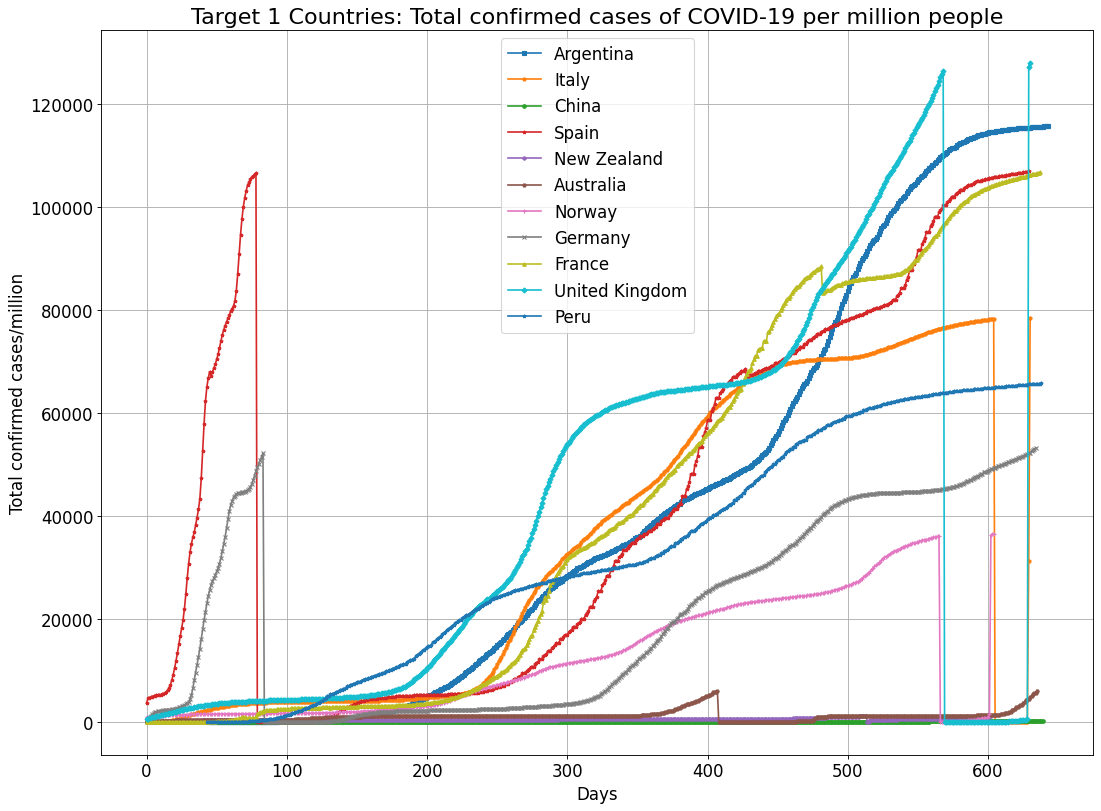

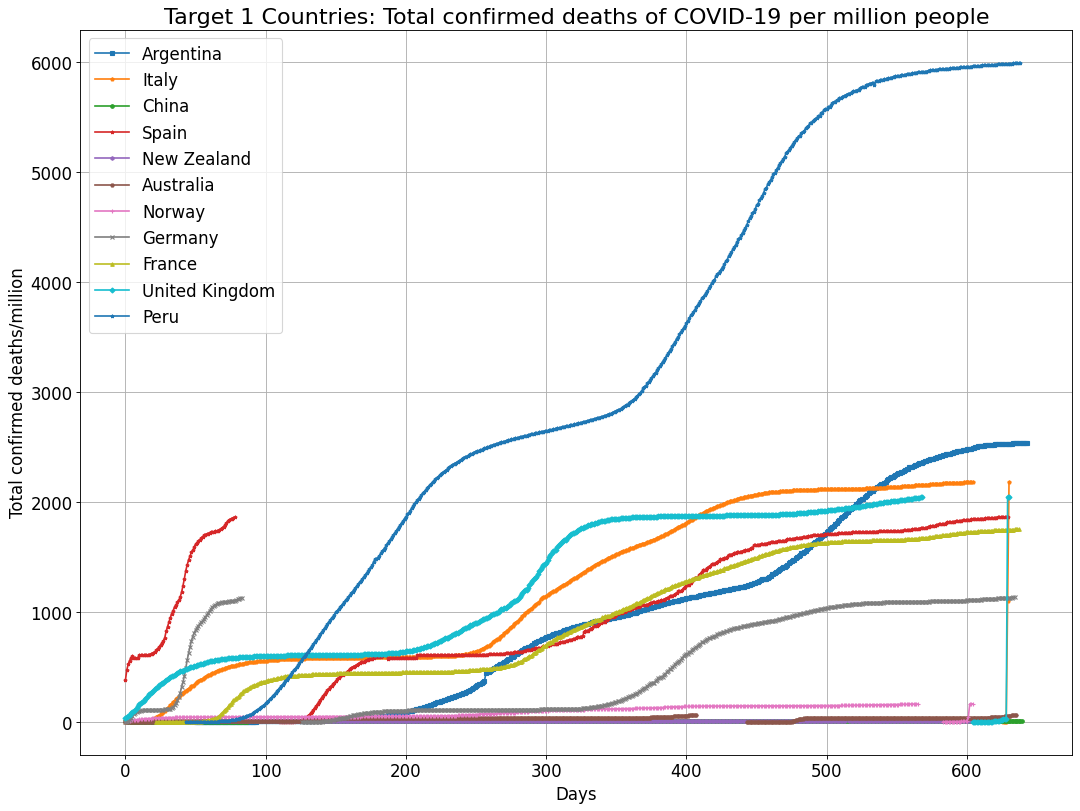

In [ ]:
## Países sin cuarentena:

#i = 0
#paises = paises_1
#for pais in paises:
#   casos_pais = data_3[cases][(data_3.Entity == pais)]
#   muertes_pais = data_3[deaths][(data_3.Entity == pais)]
#   dias = np.arange(casos_pais.shape[0]) 
#   plt.figure(i)
#   plt.plot(dias,casos_pais,label = 'Contagios X 10')
#   plt.title(pais + ' Casos')
#   plt.legend()

#   plt.figure(i)
#   plt.plot(dias,muertes_pais*10,label = 'Muertes')
#   plt.title(pais + ' Muertes')
#   plt.legend()
#   plt.show()
#   i = i + 1


## Ploteo en una sola figura:
# Casos:
i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D","*"]

for pais in paises_1:
   casos_pais = data_3[cases][(data_3.Entity == pais)]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Target 1 Countries: Total confirmed cases of COVID-19 per million people', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()

# Muertes:
i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D","*"]

for pais in paises_1:
   muertes_pais = data_3[deaths][(data_3.Entity == pais)]
   dias = np.arange(muertes_pais.shape[0]) 
   plt.plot(dias,muertes_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Target 1 Countries: Total confirmed deaths of COVID-19 per million people', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed deaths/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()

## Conclusiones del exploratorio visual de curvas: 
- Por convenciencia voy a tomar el mismo intervalo de días: 200 a 400. De los puntos anteiores, este parece ser el promedio común de comportamiento exponencial de ambas curvas, tanto la de muertes por millon como la de contagios, que respomden a estos modelos:

- $Contagios=e^{k illMil(t-t_0)}$
- $Muertes=e^{k deaths(t-t_0)}$

## Armado de Data Set:

In [ ]:
data_ml.head()

,Pais,k_deaths_mil,k_ill_mil,ratio_deaths_cases,target
0,Brazil,0.0,0.0,0.0,0
1,Venezuela,0.0,0.0,0.0,0
2,India,0.0,0.0,0.0,0
3,Bolivia,0.0,0.0,0.0,0
4,Sweden,0.0,0.0,0.0,0


In [ ]:
## Calculo de k por países, y ratios y las agrego al data set que armé:
# Uso un fiteo por cuadrados mínimos exponencial:
# Lo hago para todos los países.

paises = all_paises
i = 0
for pais in paises:
    casos_pais = data_3[cases][(data_3.Entity == pais)][200:401]
    muertes_pais = data_3[deaths][(data_3.Entity == pais)][200:401]
    ratio_muertes_casos = np.mean(muertes_pais)/np.mean(casos_pais)
    dias = np.arange(200,401) 
    popt_casos , pcov_casos  = curve_fit(exponencial, dias, casos_pais, maxfev = 2000)       # Fiteo las exponenciales de casos.
    popt_muert , pcov_muert  = curve_fit(exponencial, dias, muertes_pais, maxfev = 2000)     # Fiteo las exponenciales de muertes.
    # Inserto los datos al df que voy a usar para hacer el modelo:
    data_ml.loc[i,('k_ill_mil')]          =  popt_casos[0]
    data_ml.loc[i,('k_deaths_mil')]       =  popt_muert[0]
    data_ml.loc[i,('ratio_deaths_cases')] =  ratio_muertes_casos
    i = i + 1

In [ ]:
# Data final:
data_ml = data_ml.sample(frac=1).reset_index(drop=True) # Hago un shuffle.
data_ml

,Pais,k_deaths_mil,k_ill_mil,ratio_deaths_cases,target
0,Singapore,0.992212,0.991439,0.016853,0
1,Argentina,0.994657,0.988459,0.027485,1
2,China,0.994922,0.988423,0.036407,1
3,France,0.987267,0.990586,0.025587,1
4,Netherlands,0.990920,0.993706,0.011346,0
5,South Korea,0.991648,0.994281,0.000507,0
6,Spain,0.987562,0.992686,0.024608,1
7,Uruguay,0.987388,0.994491,0.050405,0
8,Peru,0.987335,0.992279,0.013853,1
9,United Kingdom,0.994835,0.991810,0.095476,1


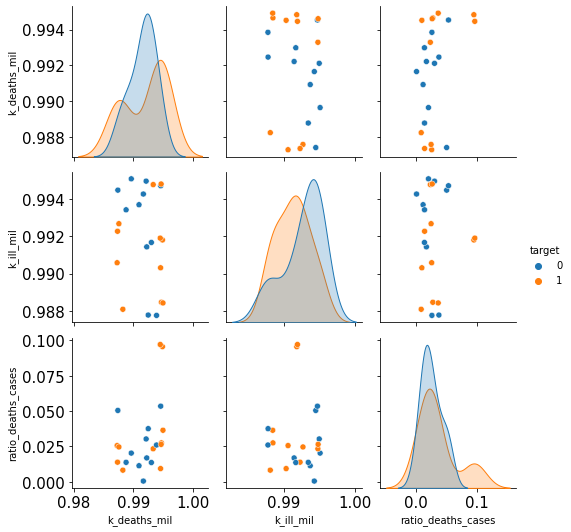

In [ ]:
sns.pairplot(data=data_ml[['k_deaths_mil'	,'k_ill_mil',	'ratio_deaths_cases',	'target']],hue = 'target')

## Machine learning: 
- Modelo de clasifiacación ml.
- Voy a usar Regresión Logística y Naive Bayes.
- Uso un accuracy del 50% como benchmark. Mis modelos van a tener que ser mejores a 50% en accuracy para ser satisfactorios.

In [ ]:
## Separo mi data en X e y:
X = data_ml[['k_deaths_mil','k_ill_mil','ratio_deaths_cases']]
y = data_ml[['target']] # Paises que hicieron cuarentena: 1, Paises que no hicieron cuarentena: 0.

## Separo en train y test:

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

## Naive Bayes:

nb = GaussianNB() # Benchmark para comparar contra Linear SVC y XGboost.
nb.fit(x_train,np.array(y_train).ravel())

## Regresion logistica:

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Gauss


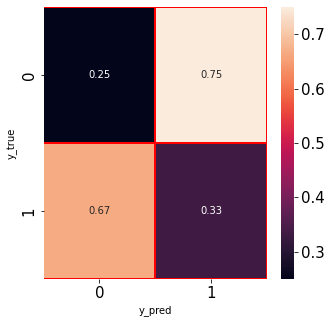

acc :  0.2857142857142857
F1 Score:  0.28571428571428575
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.25      0.33      0.29         3

    accuracy                           0.29         7
   macro avg       0.29      0.29      0.29         7
weighted avg       0.30      0.29      0.29         7

LogReg


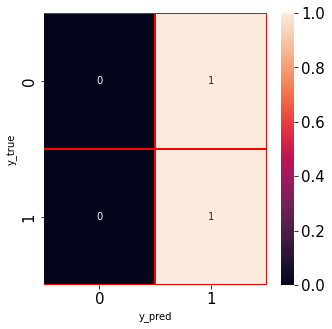

acc :  0.42857142857142855
F1 Score:  0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      1.00      0.60         3

    accuracy                           0.43         7
   macro avg       0.21      0.50      0.30         7
weighted avg       0.18      0.43      0.26         7



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#--------
## Gauss:
#--------
print('Gauss')
y_pred_nb = nb.predict(x_test)
confusion(y_test,y_pred_nb)

print("acc : ",accuracy_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test ,y_pred_nb, average='macro'))
print(classification_report(y_test, y_pred_nb))

#-----------------------
## Regresión Logistica:
#-----------------------
print('LogReg')
y_pred_logreg = logreg.predict(x_test)
confusion(y_test,y_pred_logreg)

print("acc : ",accuracy_score(y_test, y_pred_logreg))
print("F1 Score: ", f1_score(y_test ,y_pred_logreg, average='macro'))
print(classification_report(y_test, y_pred_logreg))